<a href="https://colab.research.google.com/github/yarenuyaroglu/HuggingFace/blob/main/celebrityInpainting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install diffusers
!pip install matplotlib
!pip install Pillow

In [4]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from diffusers import StableDiffusionInpaintPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
base_dir = '/content/drive/MyDrive/DiffusersProject/celebrityFacesDataset/data/train'
output_dir = '/content/drive/MyDrive/DiffusersProject/celebrityFacesDataset/output'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

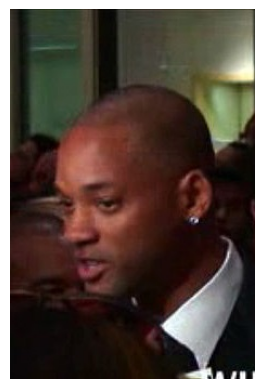

In [7]:
will_smith_dir = os.path.join(base_dir, 'will_smith')
files = os.listdir(will_smith_dir)
image_path = os.path.join(will_smith_dir, '800px-Time_100_Will_Smith_title.jpg')
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
pipe = StableDiffusionInpaintPipeline.from_pretrained("runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280

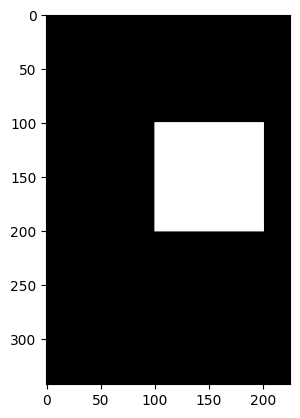

In [9]:
img = Image.open(image_path).convert('RGB')
mask = Image.new('L', img.size, 0)
draw = ImageDraw.Draw(mask)
draw.rectangle([100, 100, 200, 200], fill=255)
plt.imshow(mask, cmap='gray')
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

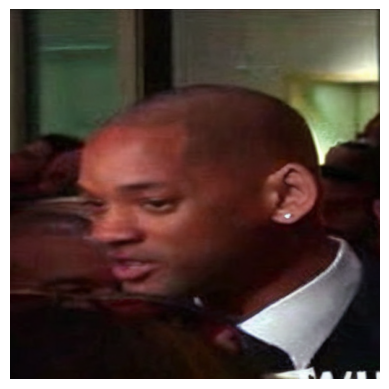

In [10]:
output = pipe(prompt="A photo of Will Smith", image=img, mask_image=mask).images[0]
plt.imshow(output)
plt.axis('off')
plt.show()

In [11]:
draw.rectangle([50, 200, 150, 300], fill=255)  # Ağız bölgesi için maske

In [12]:
completed_image = pipe(prompt="A serious celebrity face", image=img, mask_image=mask, num_inference_steps=50, seed=42).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

"A surprised celebrity face"
"A serious celebrity face"
"A happy celebrity face"
"A thoughtful celebrity face"
"A laughing celebrity face"
"A cheerful celebrity face"
"A pensive celebrity face"

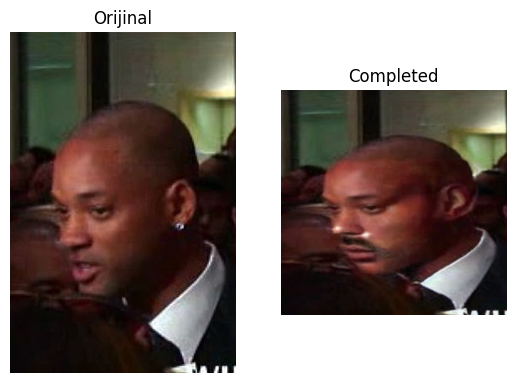

In [13]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[0].set_title("Orijinal")
ax[0].axis('off')

ax[1].imshow(completed_image)
ax[1].set_title("Completed")
ax[1].axis('off')
plt.show()

**WEEK 2**

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

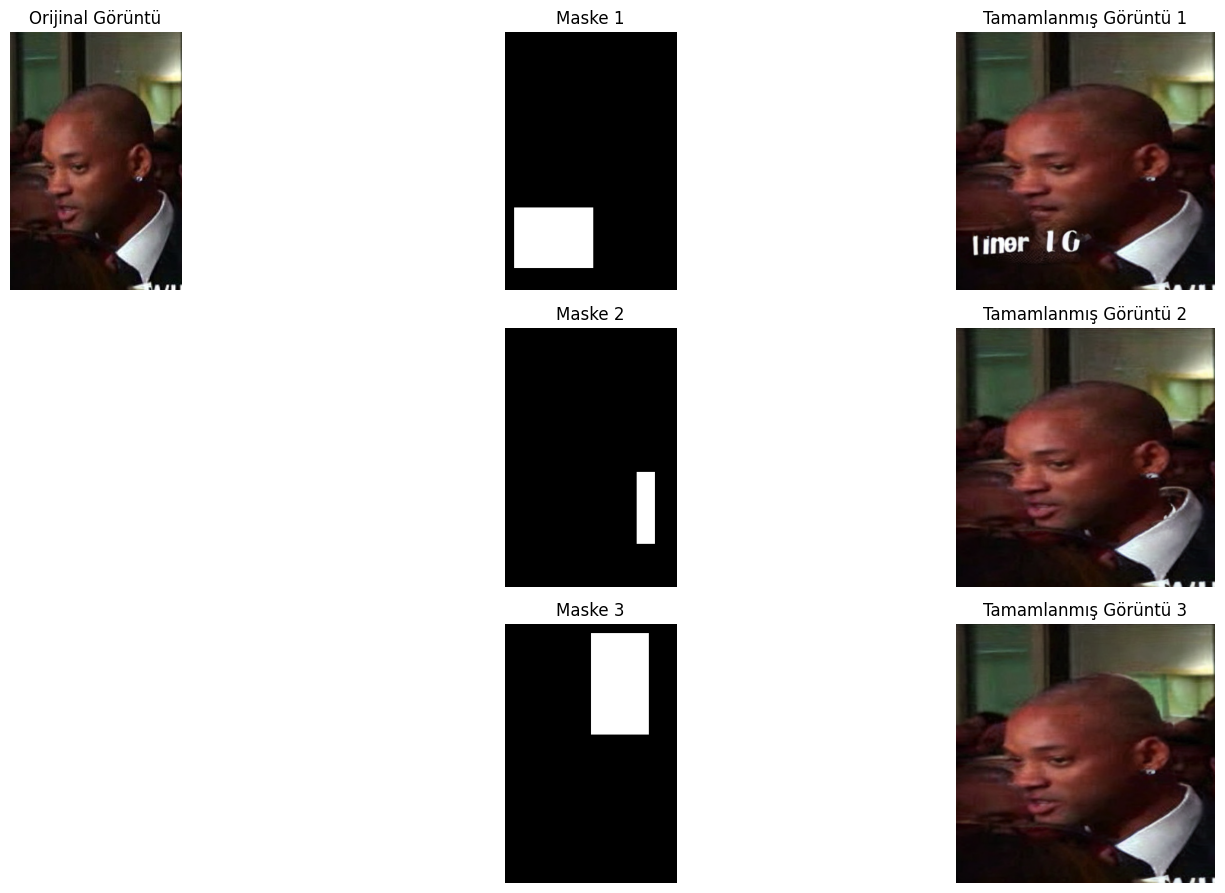

In [16]:
import random
img = Image.open(image_path).convert("RGB")

# Çıktıları ve maskeleri bu listelerde sakla
outputs = []
masks = []

# 3 kez rastgele maskeleme işlemi yap
for _ in range(3):
    width, height = img.size
    # Rastgele dikdörtgen alanı
    x1 = random.randint(0, width - 50)  # Sol üst köşe
    y1 = random.randint(0, height - 50)  # Sol üst köşe
    x2 = random.randint(x1 + 20, width)  # Sağ alt köşe
    y2 = random.randint(y1 + 20, height)  # Sağ alt köşe

    mask = Image.new('L', img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.rectangle([x1, y1, x2, y2], fill=255)

    output = pipe(prompt="A smiling celebrity face", image=img, mask_image=mask).images[0]
    # Sonuçları ve maskeleri listeye ekle
    outputs.append(output)
    masks.append(mask)

plt.figure(figsize=(15, 12))
plt.subplot(4, 3, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Orijinal Görüntü")

for i in range(3):
    plt.subplot(4, 3, i * 3 + 2)
    plt.imshow(masks[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Maske {i + 1}")

    plt.subplot(4, 3, i * 3 + 3)
    plt.imshow(outputs[i])
    plt.axis('off')
    plt.title(f"Tamamlanmış Görüntü {i + 1}")

plt.tight_layout()
plt.show()

In [17]:
dwayne_path = '/content/drive/MyDrive/DiffusersProject/celebrityFacesDataset/data/train/dwayne_johnson/Dwayne_Johnson_2,_2013.jpg'
anne_path = '/content/drive/MyDrive/DiffusersProject/celebrityFacesDataset/data/train/anne_hathaway/353px-Anne_Hathaway_2019_(cropped).jpg'

dwayne_img = Image.open(dwayne_path).convert('RGBA')
anne_img = Image.open(anne_path).convert('RGBA')

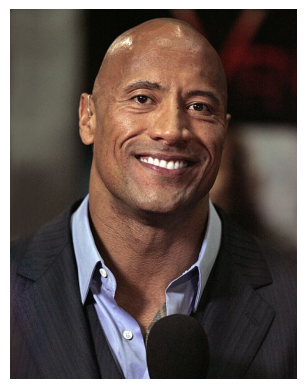

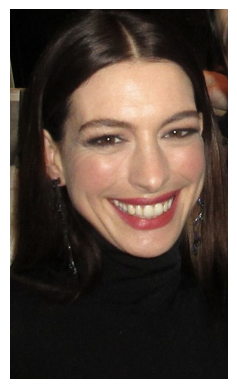

In [18]:
dwayne_img = Image.open(dwayne_path)
anne_img = Image.open(anne_path)
plt.imshow(dwayne_img)
plt.axis('off')
plt.show()
plt.imshow(anne_img)
plt.axis('off')
plt.show()

In [19]:
!pip install opencv-python
!pip install opencv-python-headless

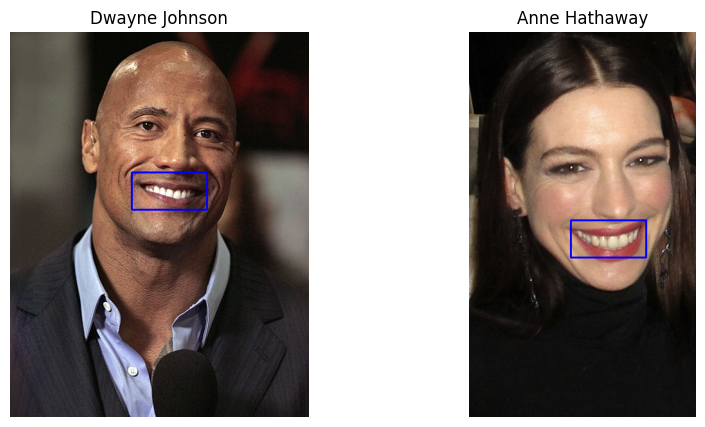

In [36]:
import cv2
import matplotlib.pyplot as plt

# Gülümseme tespiti için Haar Cascade
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

def find_smile(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Yüzleri tespit et
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    smile_coords = []  # Gülümseme koordinatları için boş bir liste

    for (x, y, w, h) in faces:
        # Sadece yüzün alt yarısında gülümsemeyi ara(gözlerle karışmaması için)
        roi_gray = gray[y + h//2:y + h, x:x + w]  # Yüzün alt yarısı
        roi_color = img[y + h//2:y + h, x:x + w]

        smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.8, minNeighbors=20)

        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (255, 0, 0), 2)
            smile_coords.append(((sx + x, sy + y + h//2, sw, sh), roi_color[sy:sy + sh, sx:sx + sw]))  # Gülümseme ve koordinatlar

    return img, smile_coords #resim ve koordinatları döndürsün

# Gülümsemeleri tespit et
dwayne_output, dwayne_smiles = find_smile(dwayne_path)
anne_output, anne_smiles = find_smile(anne_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(dwayne_output, cv2.COLOR_BGR2RGB))
plt.title('Dwayne Johnson')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(anne_output, cv2.COLOR_BGR2RGB))
plt.title('Anne Hathaway')
plt.axis('off')

plt.show()

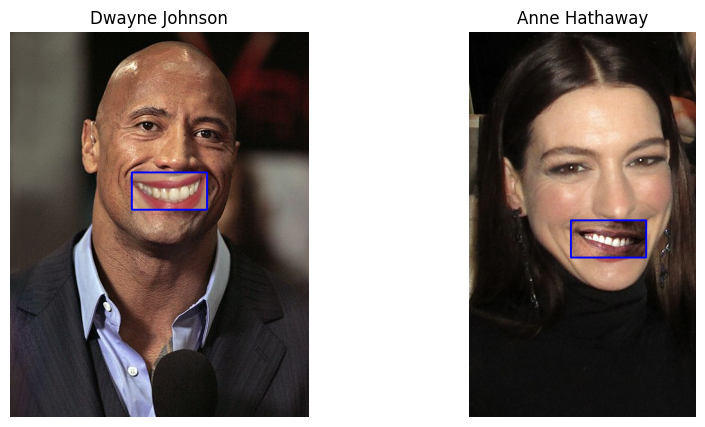

In [37]:
# Gülümsemeleri swapleme
if dwayne_smiles and anne_smiles:
    dwayne_smile_coords, dwayne_smile = dwayne_smiles[0]
    dx, dy, dw, dh = dwayne_smile_coords

    anne_smile_coords, anne_smile = anne_smiles[0]
    ax, ay, aw, ah = anne_smile_coords

    # Gülümsemeleri resize et (yapmazsan hata alırsın)
    resized_dwayne_smile = cv2.resize(dwayne_smile, (aw, ah))
    resized_anne_smile = cv2.resize(anne_smile, (dw, dh))

    # Gülümsemeleri yerleştir
    anne_output[ay:ay + ah, ax:ax + aw] = resized_dwayne_smile
    dwayne_output[dy:dy + dh, dx:dx + dw] = resized_anne_smile

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(dwayne_output, cv2.COLOR_BGR2RGB))
    plt.title('Dwayne Johnson')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(anne_output, cv2.COLOR_BGR2RGB))
    plt.title('Anne Hathaway')
    plt.axis('off')

    plt.show()
